In [ ]:
ls

drive/  sample_data/


In [ ]:
cd/content/drive/MyDrive/project sp1

/content/drive/MyDrive/project sp1


In [ ]:
ls

'Dataset Plant Disease'/   frsfdp.zip   fruit.h5


In [ ]:
!unzip frsfdp.zip

Archive:  frsfdp.zip
replace Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

IMAGE AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/project sp1/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size = (128,128),batch_size=8,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/project sp1/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size = (128,128),batch_size=8,class_mode = 'categorical')


Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [ ]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model = Sequential()


In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))


In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [ ]:
model.add(Flatten())


In [ ]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))

In [ ]:
model.add(Dense(9,activation = 'softmax'))


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 300)               38102700  
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 75)                11325     
                                                        

In [19]:
model.fit_generator(x_train,steps_per_epoch=89,epochs=20,validation_data=x_test,validation_steps=27)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
89/89 [==============================] - 240s 3s/step - loss: 2.5226 - accuracy: 0.2177 - val_loss: 1.8249 - val_accuracy: 0.4259
Epoch 2/20
89/89 [==============================] - 219s 2s/step - loss: 1.6819 - accuracy: 0.3975 - val_loss: 1.5049 - val_accuracy: 0.4907
Epoch 3/20
89/89 [==============================] - 209s 2s/step - loss: 1.2938 - accuracy: 0.5618 - val_loss: 1.4205 - val_accuracy: 0.4907
Epoch 4/20
89/89 [==============================] - 192s 2s/step - loss: 1.2039 - accuracy: 0.5660 - val_loss: 1.0881 - val_accuracy: 0.6065
Epoch 5/20
89/89 [==============================] - 183s 2s/step - loss: 1.2170 - accuracy: 0.5660 - val_loss: 1.0996 - val_accuracy: 0.5787
Epoch 6/20
89/89 [==============================] - 179s 2s/step - loss: 1.0703 - accuracy: 0.6222 - val_loss: 1.0568 - val_accuracy: 0.6204
Epoch 7/20
89/89 [==============================] - 162s 2s/step - loss: 1.0685 - accuracy: 0.6138 - val_loss: 0.8573 - val_accuracy: 0.6435
Epoch 8/20
89

In [20]:
model.save("vegetable.h5")


TESTING THE MODEL

In [21]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model =load_model("vegetable.h5")


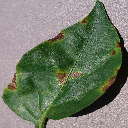

In [25]:
img = image.load_img(r"/content/drive/MyDrive/project sp1/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/024623ab-be81-4d99-a653-c3be1495ce8e___JR_B.Spot 8889.JPG",target_size=(128,128))
img

In [27]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x),axis=1)

index=['Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot']

index[pred[0]]

1/1 [==============================] - 0s 66ms/step


'Pepper,_bell___healthy'